<a href="https://colab.research.google.com/github/LazaroR-u/EQNN/blob/main/Quark_gluon_study_CNN_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%%capture
pip install pennylane jax jaxlib

In [24]:
import pennylane as qml
from pennylane import numpy as np
import jax
from jax import numpy as jnp
import optax
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import h5py
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
X=np.load('x_data.npy')
y=np.load('y_data.npy')

X.shape, y.shape

((10000, 16, 16, 3), (10000,))

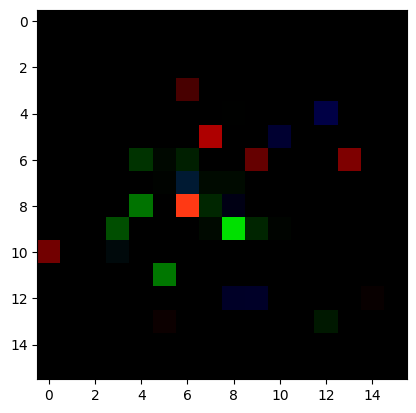

In [18]:
plt.imshow(X[0], cmap='viridis')
plt.show()

In [19]:
def preprocess_jnp(
    classes: jnp.ndarray, trainloader: DataLoader, testloader: DataLoader
):
    r"""Load Data from PyTorch DataLoader into JAX NumPy Arrays

    Args:
        classes (jnp.ndarray) : List of integers representing data classes to be loaded.
            If None, return all classes.
        trainloader (torch.utils.data.DataLoader) : Trainset loader.
        testloader (torch.utils.data.DataLoader) : Testset loader.

    Returns:
        Tuple[jnp.ndarray, ...]: Tuple of training and test data/labels. The outputs are
        ordered as follows:

        * ``X_train``: Training samples of shape ``(num_train, img_size, img_size,
          num_channel)``.
        * ``Y_train``: Training labels of shape ``(num_train, )``.
        * ``X_test``: Test samples of shape ``(num_test, img_size, img_size,
          num_channel)``.
        * ``Y_train``: Test labels of shape ``(num_test, )``.
    """
    X_train = []
    Y_train = []

    X_test = []
    Y_test = []

    print(classes)
    # Load data as a np.ndarray
    for i, data in enumerate(trainloader, 0):
        image, label = data
        X_train.extend(list(jnp.transpose(image.detach().numpy(), (0, 2, 3, 1))))
        Y_train.extend(list(label.detach().numpy()))

    for i, data in enumerate(testloader, 0):
        image, label = data
        X_test.extend(list(jnp.transpose(image.detach().numpy(), (0, 2, 3, 1))))
        Y_test.extend(list(label.detach().numpy()))

    X_train = jnp.array(X_train)
    Y_train = jnp.array(Y_train)

    X_test = jnp.array(X_test)
    Y_test = jnp.array(Y_test)

    if classes is not None:
        train_mask = np.isin(Y_train, classes)
        X_train = X_train[train_mask]
        Y_train = Y_train[train_mask]

        Y_train = Y_train.at[jnp.argwhere(Y_train == classes[0])].set(0.0)
        Y_train = Y_train.at[jnp.argwhere(Y_train == classes[1])].set(1.0)

        test_mask = np.isin(Y_test, classes)
        X_test = X_test[test_mask]
        Y_test = Y_test[test_mask]
        Y_test = Y_test.at[jnp.argwhere(Y_test == classes[0])].set(0.0)
        Y_test = Y_test.at[jnp.argwhere(Y_test == classes[1])].set(1.0)

    return X_train, Y_train, X_test, Y_test

In [20]:
# import torch
# from torch.utils.data import Dataset, DataLoader, Subset
# from torchvision import transforms
# import h5py
# from sklearn.model_selection import train_test_split


# class CustomDatasetFromHDF5(Dataset):
#     def __init__(self, path, transform=None):
#         with h5py.File(path, "r") as file:
#             self.data = file["X"][:]
#             self.labels = file["y"][:]
#         self.transform = transform

#     def __getitem__(self, idx):
#         image = self.data[idx]
#         label = self.labels[idx]

#         if self.transform:
#             image = self.transform(image)

#         return image, label

#     def __len__(self):
#         return len(self.labels)


# img_size = 16

# # Definir transformaciones
# transform = transforms.Compose(
#     [
#         transforms.ToPILImage(),
#         transforms.Resize((img_size, img_size)),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomVerticalFlip(),
#         transforms.ToTensor(),
#     ]
# )

# # Crear dataset
# data = CustomDatasetFromHDF5(
#     "/home/lazaror/quantum/pruebas/EQCNN_local_testing/EQNN_for_HEP/Equivariant_QCNN/data/QG_16x16x1_dataset_50k",
#     transform=transform,
# )

# # Dividir el dataset en entrenamiento y prueba
# train_size = int(0.8 * len(data))
# test_size = len(data) - train_size

# train_ds, test_ds = torch.utils.data.random_split(data, [train_size, test_size])

# # Crear dataloaders
# trainloader = DataLoader(train_ds, batch_size=1000, shuffle=True)
# testloader = DataLoader(test_ds, batch_size=1000, shuffle=True)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/lazaror/quantum/pruebas/EQCNN_local_testing/EQNN_for_HEP/Equivariant_QCNN/data/QG_16x16x1_dataset_50k', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# classes = [0,1]
# X_train, Y_train, X_test, Y_test = preprocess_jnp(
#             classes, trainloader, testloader
#         )

[0, 1]


/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible

In [ ]:
# from collections import Counter

# # Contadores para etiquetas
# label_counts = Counter()

# # Iterar sobre el dataloader
# for _, labels in trainloader:
#     label_counts.update(labels.numpy())

# total_train = sum(label_counts.values())
# count_0 = label_counts[0]
# count_1 = label_counts[1]

# print(f"Train dataset: {total_train}")
# print(f"Total label 0: {count_0}")
# print(f"Total label 1: {count_1}")

Total de datos en entrenamiento: 40000
Total de etiquetas 0: 20023
Total de etiquetas 1: 19977


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # split quark and gluon data
# quark = X_train[Y_train == 1]
# gluon = X_train[Y_train == 0]


# # flat data
# quark_flat = np.array([img.reshape(16*16) for img in quark[:]])
# gluon_flat = np.array([img.reshape(16*16) for img in gluon[:]])

# # calculate the mean value per pixel in each kind of data
# average_quark_pixel_values = np.mean(quark_flat, axis=0) * 255  # Escalamos por 255
# average_gluon_pixel_values = np.mean(gluon_flat, axis=0) * 255  # Escalamos por 255

# # Create a dataframe with the mean values for gluon and quark data and a list with all the pixels
# df = {"pixel": np.arange(256), "quark_value": average_quark_pixel_values, "gluon_value": average_gluon_pixel_values}
# df = pd.DataFrame(df)

# # plot the distributions
# plt.figure(figsize=(10, 6))
# plt.plot(df["pixel"], df["quark_value"], label = "quark pixel distribution")
# plt.plot(df["pixel"], df["gluon_value"], label = "gluon pixel distribution")
# plt.xlabel('Pixel location')
# plt.ylabel('Intensity')
# plt.title('Mean pixel distribution for quark-gluon data')
# plt.legend()
# plt.show()



NameError: name 'quark_flat' is not defined

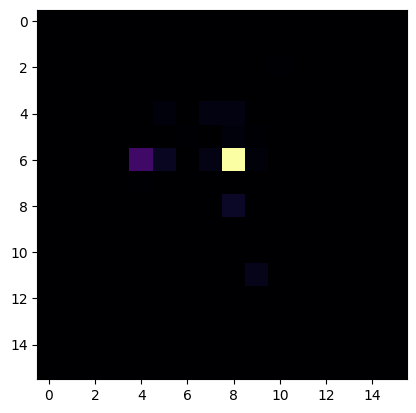

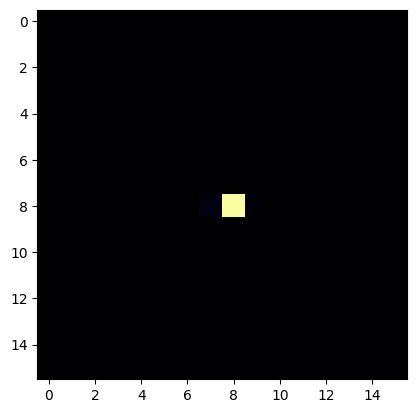

In [ ]:
# plt.imshow(quark[0], cmap='inferno')
# plt.show()
# plt.imshow(gluon[0], cmap='inferno')
# plt.show()

Interpretation:

A first view, we can see that the two samples are quite similar,

**Statistics test**

**Kolmogorov-Smirnov test (KS)**

If the p-value is small (lower than 0.05), we can reject the null hypothesis that the two samples are from the same distribution.

**Chi-Square test ($\xi^2 $)**

In the same way, if the p-value is small indicates that is less probably that the two distributions are the same.



In [ ]:
from scipy.stats import ks_2samp

ks_statistic, ks_p_value = ks_2samp(average_quark_pixel_values, average_gluon_pixel_values)
print(f'Prueba KS: estadístico = {ks_statistic}, p-valor = {ks_p_value}')


Prueba KS: estadístico = 0.14453125, p-valor = 0.009440529437020562


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = np.array([average_quark_pixel_values, average_gluon_pixel_values])

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(contingency_table)
print(f'Prueba Chi-cuadrado: estadístico = {chi2_statistic}, p-valor = {chi2_p_value}')


Prueba Chi-cuadrado: estadístico = 15.156997095520637, p-valor = 1.0


## Classical CNN

In [35]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(16, 16, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,417 (204.75 KB)

 Trainable params: 52,417 (204.75 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import csv
import time
import numpy as np
import tensorflow as tf

# Initialize variables to store metrics
training_time = 0
inference_time = 0
final_train_accuracy = 0
final_test_accuracy = 0

# Assuming you have your data prepared as X_train, Y_train, X_test, Y_test
# And your model is already defined

# Start timing the training
start_time = time.time()

# Train the model
history = model.fit(
    np.array(X_train),
    np.array(Y_train),
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# End timing the training
end_time = time.time()
training_time = end_time - start_time

# Get final accuracies
final_train_accuracy = history.history['accuracy'][-1] * 100
final_test_accuracy = history.history['val_accuracy'][-1] * 100

# Measure inference time
inference_start_time = time.time()
model.predict(np.array(X_test))
inference_end_time = time.time()
inference_time = inference_end_time - inference_start_time

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5308 - loss: 0.6905 - val_accuracy: 0.5244 - val_loss: 0.6953
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5784 - loss: 0.6742 - val_accuracy: 0.5794 - val_loss: 0.6803
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5985 - loss: 0.6629 - val_accuracy: 0.5919 - val_loss: 0.6777
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6273 - loss: 0.6485 - val_accuracy: 0.5838 - val_loss: 0.6755
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6223 - loss: 0.6476 - val_accuracy: 0.5594 - val_loss: 0.6970
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6287 - loss: 0.6406 - val_accuracy: 0.5850 - val_loss: 0.6770
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6422 - loss: 0.6337 - val_accuracy: 0.5806 - val_loss: 0.6793
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6580 - loss: 0.6184 - val_accu

AttributeError: 'str' object has no attribute '__name__'

In [38]:

# Prepare metrics for CSV
metrics = {
    'Optimizer': model.optimizer.__class__.__name__,
    'Learning_Rate': float(model.optimizer.learning_rate.numpy()),
    'Batch_Size': 32,
    'Epochs': 50,
    'Loss_Function': 'binary_crossentropy',
    'Training_Subset_Size': f"{len(X_train)} (80% of dataset due to validation_split)",
    'Training_Time': f"{training_time:.2f}",
    'Inference_Time': f"{inference_time:.2f}",
    'Final_Train_Accuracy': f"{final_train_accuracy:.2f}",
    'Final_Test_Accuracy': f"{final_test_accuracy:.2f}"
}

# Write metrics to CSV
csv_filename = 'tensorflow_model_metrics.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=metrics.keys())
    writer.writeheader()
    writer.writerow(metrics)

print(f"Metrics have been saved to {csv_filename}")

Metrics have been saved to tensorflow_model_metrics.csv


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5408 - loss: 1.9032
Test accuracy: 0.5519999861717224


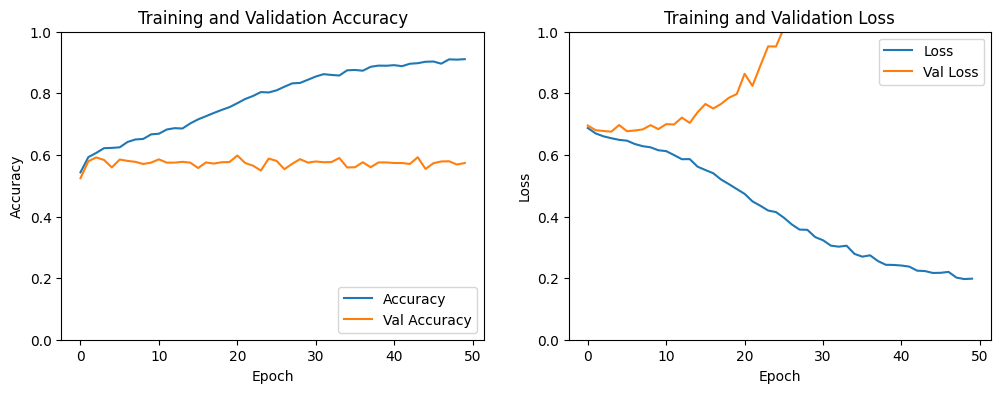

In [39]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test))
print(f'Test accuracy: {test_acc}')

# Graficar las métricas de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
